In [1]:
import pandas as pd
import numpy as np
from summary import get_run_summary, get_best_epoch, perform_analysis, add_modelname_traintype
import os

import matplotlib.pyplot as plt
plt.rcParams.update({
    'axes.titlesize': 14,    # Font size for plot titles
    'axes.labelsize': 12,    # Font size for x and y labels
    'xtick.labelsize': 10,   # Font size for x tick labels
    'ytick.labelsize': 10,   # Font size for y tick labels
    'legend.fontsize': 12,   # Font size for the legend
    'font.size': 12     ,     # Default font size
    'font.family': 'serif',
})

In [41]:
# path = r'E:\Thesis\plots\pc_labelled_data_impact.csv'
# data = pd.read_csv(path)

In [4]:
jobids = {
    '45323':10,
    '45324':10,
    '45326':10,
    '45535':10,
    '45536':10,

    '45281':25,
    '45282':25,
    '45285':25,
    '45537':25,
    '45539':25,

    '45329':50,
    '45330':50,
    '45332':50,
    '45540':50,
    '45541':50,
    
    '44946':100,
    '44993':100,
    '45000':100,
    '45489':100,
    '45452':100}

In [5]:
path =r'E:\Thesis\outputs\01_finalised_models'

In [6]:
# look through the directory and get all folder names that starts with the jobid, collect in a list
folders = os.listdir(path)
folders = [f for f in folders if f[:5] in jobids.keys()]
folders



['44946_20240524_s2_scratch',
 '44993_20240526_s2_siam_96_scratch',
 '45000_20240527_single_segsiam_ft',
 '45281_20240604_s2',
 '45282_20240604_s2_siam_96',
 '45285_20240604_single_segsiam',
 '45323_20240604_s2',
 '45324_20240604_s2_siam_96',
 '45326_20240604_single_segsiam',
 '45329_20240604_s2',
 '45330_20240604_s2_siam_96',
 '45332_20240604_single_segsiam',
 '45452_20240606_dual_ft',
 '45489_20240607_single_recon_ft',
 '45535_20240609_single_recon',
 '45536_20240609_dual',
 '45537_20240609_single_recon',
 '45539_20240609_dual',
 '45540_20240609_single_recon',
 '45541_20240609_dual']

In [7]:
#get summary for all models
summary = pd.DataFrame()
for folder in folders:
    summary = pd.concat([summary, get_run_summary(path, folder)], axis=0)
    summary['pc_labelled'] = summary['job_id'].map(jobids)

# cal
summary

,basename,model,job_id,fold_0_iou,fold_1_iou,fold_2_iou,fold_0_f1,fold_1_f1,fold_2_f1,test_iou,test_f1,tot_duration,pc_labelled
0,44946_20240524_s2_scratch,s2_scratch,44946,0.4132,0.4268,0.4171,0.5812,0.5950,0.5854,0.3479,0.5133,959.0,100
0,44993_20240526_s2_siam_96_scratch,s2_siam_96_scratch,44993,0.4356,0.4464,0.4526,0.6031,0.6138,0.6209,0.3747,0.5420,1190.0,100
0,45000_20240527_single_segsiam_ft,single_segsiam_ft,45000,0.4319,0.4092,0.4156,0.5993,0.5767,0.5849,0.3615,0.5285,1026.0,100
0,45281_20240604_s2,s2,45281,0.3927,0.3679,0.3666,0.5609,0.5335,0.5348,0.2839,0.4385,211.0,25
0,45282_20240604_s2_siam_96,s2_siam_96,45282,0.2856,0.3995,0.3868,0.4414,0.5628,0.5565,0.3351,0.4987,265.0,25
0,45285_20240604_single_segsiam,single_segsiam,45285,0.3649,0.3931,0.3876,0.5324,0.5592,0.5569,0.3073,0.4673,250.0,25
0,45323_20240604_s2,s2,45323,0.3749,0.2873,0.2050,0.5436,0.4437,0.3384,0.2458,0.3904,92.0,10
0,45324_20240604_s2_siam_96,s2_siam_96,45324,0.3016,0.2855,0.3181,0.4612,0.4363,0.4798,0.3059,0.4657,107.0,10
0,45326_20240604_single_segsiam,single_segsiam,45326,0.2751,0.3357,0.2224,0.4299,0.4978,0.3634,0.2313,0.3708,98.0,10
0,45329_20240604_s2,s2,45329,0.4382,0.3918,0.3925,0.6067,0.5596,0.5598,0.3239,0.4861,427.0,50


In [8]:
data= perform_analysis(summary)
data

,basename,model,job_id,fold_0_iou,fold_1_iou,fold_2_iou,fold_0_f1,fold_1_f1,fold_2_f1,test_iou,test_f1,tot_duration,pc_labelled,stdev_val_iou,stdev_val_f1,avg_val_iou,avg_val_f1
0,44946_20240524_s2_scratch,s2_scratch,44946,0.4132,0.4268,0.4171,0.5812,0.5950,0.5854,0.3479,0.5133,959.0,100,0.007003,0.007074,0.419033,0.587200
1,44993_20240526_s2_siam_96_scratch,s2_siam_96_scratch,44993,0.4356,0.4464,0.4526,0.6031,0.6138,0.6209,0.3747,0.5420,1190.0,100,0.008603,0.008960,0.444867,0.612600
2,45000_20240527_single_segsiam_ft,single_segsiam_ft,45000,0.4319,0.4092,0.4156,0.5993,0.5767,0.5849,0.3615,0.5285,1026.0,100,0.011704,0.011441,0.418900,0.586967
3,45281_20240604_s2,s2,45281,0.3927,0.3679,0.3666,0.5609,0.5335,0.5348,0.2839,0.4385,211.0,25,0.014708,0.015458,0.375733,0.543067
4,45282_20240604_s2_siam_96,s2_siam_96,45282,0.2856,0.3995,0.3868,0.4414,0.5628,0.5565,0.3351,0.4987,265.0,25,0.062418,0.068344,0.357300,0.520233
5,45285_20240604_single_segsiam,single_segsiam,45285,0.3649,0.3931,0.3876,0.5324,0.5592,0.5569,0.3073,0.4673,250.0,25,0.014949,0.014854,0.381867,0.549500
6,45323_20240604_s2,s2,45323,0.3749,0.2873,0.2050,0.5436,0.4437,0.3384,0.2458,0.3904,92.0,10,0.084964,0.102612,0.289067,0.441900
7,45324_20240604_s2_siam_96,s2_siam_96,45324,0.3016,0.2855,0.3181,0.4612,0.4363,0.4798,0.3059,0.4657,107.0,10,0.016300,0.021826,0.301733,0.459100
8,45326_20240604_single_segsiam,single_segsiam,45326,0.2751,0.3357,0.2224,0.4299,0.4978,0.3634,0.2313,0.3708,98.0,10,0.056696,0.067201,0.277733,0.430367
9,45329_20240604_s2,s2,45329,0.4382,0.3918,0.3925,0.6067,0.5596,0.5598,0.3239,0.4861,427.0,50,0.026589,0.027136,0.407500,0.575367


In [9]:
# map names:
dict = {
    's2': 's2_scratch',
    's2_siam_96': 's2_siam_96_scratch',
    'single_recon': 'single_recon_ft',
    'single_segsiam': 'single_segsiam_ft',
    'dual': 'dual_ft',    
    's2_siam_96_scratch': 's2_siam_96_scratch',

    'dual_ft': 'dual_ft',    
    's2_scratch': 's2_scratch',
    'single_recon_ft': 'single_recon_ft',   
    'single_segsiam_ft': 'single_segsiam_ft',
    
}

dict_order = {
    's2_scratch': 1,
    's2_siam_96_scratch': 2,
    'single_recon_ft': 3,
    'single_segsiam_ft': 4,
    'dual_ft': 5
}

In [10]:
# rename task name based on dict
data['task_name'] = data['model'].map(dict)
data['order'] = data['task_name'].map(dict_order)
data = data.sort_values(by=['pc_labelled', 'order'])
data

,basename,model,job_id,fold_0_iou,fold_1_iou,fold_2_iou,fold_0_f1,fold_1_f1,fold_2_f1,test_iou,test_f1,tot_duration,pc_labelled,stdev_val_iou,stdev_val_f1,avg_val_iou,avg_val_f1,task_name,order
6,45323_20240604_s2,s2,45323,0.3749,0.2873,0.2050,0.5436,0.4437,0.3384,0.2458,0.3904,92.0,10,0.084964,0.102612,0.289067,0.441900,s2_scratch,1
7,45324_20240604_s2_siam_96,s2_siam_96,45324,0.3016,0.2855,0.3181,0.4612,0.4363,0.4798,0.3059,0.4657,107.0,10,0.016300,0.021826,0.301733,0.459100,s2_siam_96_scratch,2
14,45535_20240609_single_recon,single_recon,45535,0.3289,0.2571,0.1455,0.4932,0.4056,0.2529,0.2440,0.3891,88.0,10,0.092417,0.121611,0.243833,0.383900,single_recon_ft,3
8,45326_20240604_single_segsiam,single_segsiam,45326,0.2751,0.3357,0.2224,0.4299,0.4978,0.3634,0.2313,0.3708,98.0,10,0.056696,0.067201,0.277733,0.430367,single_segsiam_ft,4
15,45536_20240609_dual,dual,45536,0.3504,0.2757,0.1656,0.5165,0.4294,0.2833,0.2556,0.4031,88.0,10,0.092963,0.117837,0.263900,0.409733,dual_ft,5
3,45281_20240604_s2,s2,45281,0.3927,0.3679,0.3666,0.5609,0.5335,0.5348,0.2839,0.4385,211.0,25,0.014708,0.015458,0.375733,0.543067,s2_scratch,1
4,45282_20240604_s2_siam_96,s2_siam_96,45282,0.2856,0.3995,0.3868,0.4414,0.5628,0.5565,0.3351,0.4987,265.0,25,0.062418,0.068344,0.357300,0.520233,s2_siam_96_scratch,2
16,45537_20240609_single_recon,single_recon,45537,0.3863,0.3800,0.2951,0.5531,0.5462,0.4522,0.2947,0.4518,235.0,25,0.050933,0.056368,0.353800,0.517167,single_recon_ft,3
5,45285_20240604_single_segsiam,single_segsiam,45285,0.3649,0.3931,0.3876,0.5324,0.5592,0.5569,0.3073,0.4673,250.0,25,0.014949,0.014854,0.381867,0.549500,single_segsiam_ft,4
17,45539_20240609_dual,dual,45539,0.3969,0.3700,0.3483,0.5638,0.5348,0.5153,0.2997,0.4588,234.0,25,0.024346,0.024405,0.371733,0.537967,dual_ft,5


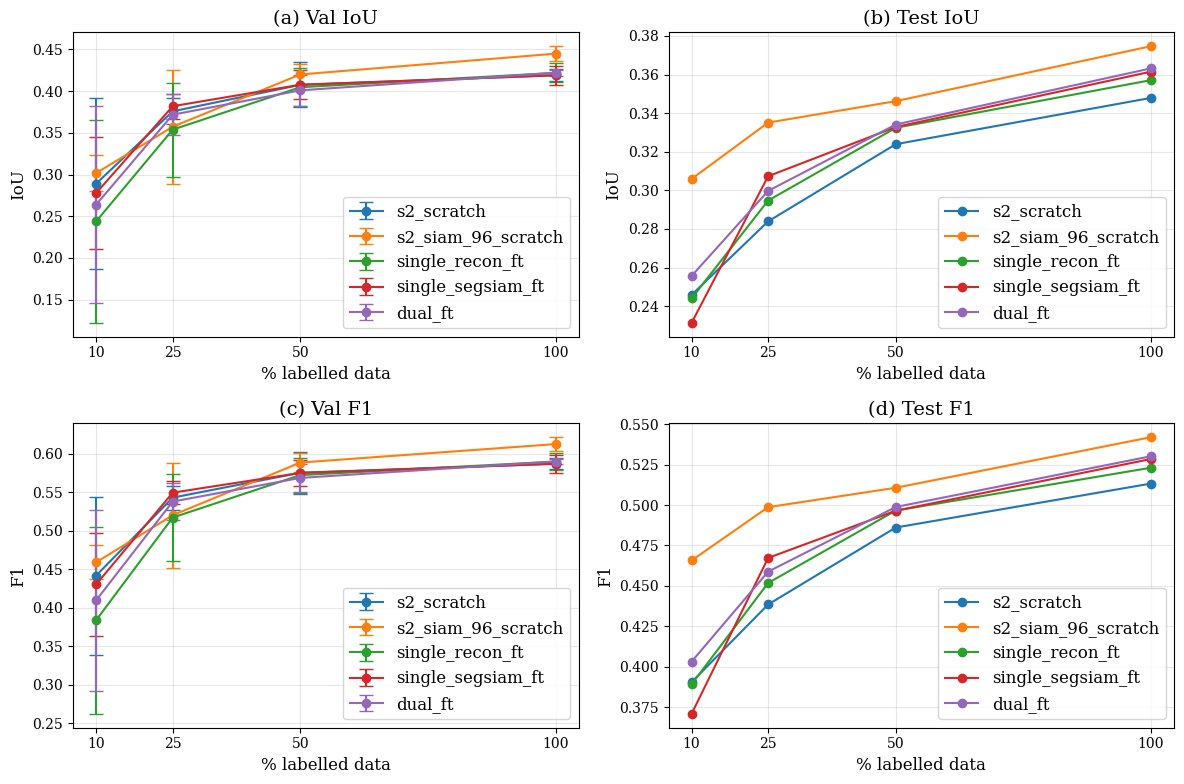

In [11]:
# plot the results. effect of labelled data on performance. on left, draw performance on val set and on right, draw performance on test set
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
for taskname, group in data.groupby('order', sort=True):
    group= group.sort_values(by='pc_labelled')
    ax[0, 0].errorbar(group['pc_labelled'], group['avg_val_iou'], yerr = group['stdev_val_f1'], marker= 'o', label=group['task_name'].values[0], capsize = 5)
    ax[0, 1].plot(group['pc_labelled'], group['test_iou'], marker = 'o',label=group['task_name'].values[0] )

    ax[1, 0].errorbar(group['pc_labelled'], group['avg_val_f1'], yerr = group['stdev_val_f1'], marker= 'o', label=group['task_name'].values[0], capsize = 5)
    ax[1, 1].plot(group['pc_labelled'], group['test_f1'], marker = 'o',label=group['task_name'].values[0] )

ax[0, 0].set_title('(a) Val IoU')
ax[0, 1].set_title('(b) Test IoU')
ax[1, 0].set_title('(c) Val F1')
ax[1, 1].set_title('(d) Test F1')

ax[0, 0].set_ylabel('IoU')
ax[0, 1].set_ylabel('IoU')
ax[1, 0].set_ylabel('F1')
ax[1, 1].set_ylabel('F1')

for axs in ax.flat:
    axs.set(xlabel='% labelled data')
    axs.set_xticks(data['pc_labelled'].unique())
    axs.grid(alpha = 0.3)
    axs.legend()

plt.tight_layout()
plt.savefig(r'E:\Thesis\outputs\00_charts\plots_transparent\pc_labelled_data_impact.png', dpi=800,pad_inches=0.2, bbox_inches='tight', transparent=True)
plt.show()